In [1]:
import datasets
import kaggle
import pandas as pd

ds = datasets.load_dataset("artem9k/ai-text-detection-pile")

In [2]:
df = pd.DataFrame(ds["train"])
df = df.drop(columns="id")
df = df.rename(columns={"source": "label"})

df.value_counts("label")

label
human    1028146
ai        364376
Name: count, dtype: int64

In [3]:
# Authenticate and download datasets from Kaggle
kaggle.api.authenticate()
kaggle_datasets = [
    "thedrcat/daigt-v2-train-dataset",
    "sunilthite/llm-detect-ai-generated-text-dataset",
]
for dataset in kaggle_datasets:
    kaggle.api.dataset_download_files(dataset, path="../data", unzip=True)

Dataset URL: https://www.kaggle.com/datasets/thedrcat/daigt-v2-train-dataset
Dataset URL: https://www.kaggle.com/datasets/sunilthite/llm-detect-ai-generated-text-dataset


In [4]:
df2 = pd.read_csv("../data/train_v2_drcat_02.csv", usecols=["label", "text"])
df3 = pd.read_csv("../data/Training_Essay_Data.csv")[["generated", "text"]].rename(columns={"generated": "label"})
df2.value_counts("label")

label
0    27371
1    17497
Name: count, dtype: int64

In [5]:
df3.value_counts("label")

label
0    17508
1    11637
Name: count, dtype: int64

In [6]:
df2["label"] = df2["label"].apply(lambda x: "ai" if x == 1 else "human")
df3["label"] = df3["label"].apply(lambda x: "ai" if x == 1 else "human")

In [7]:
df = pd.concat([df, df2, df3], ignore_index=True).drop_duplicates(subset="text")
df.value_counts("label")

label
human    1061579
ai        389877
Name: count, dtype: int64

<Axes: xlabel='text', ylabel='Density'>

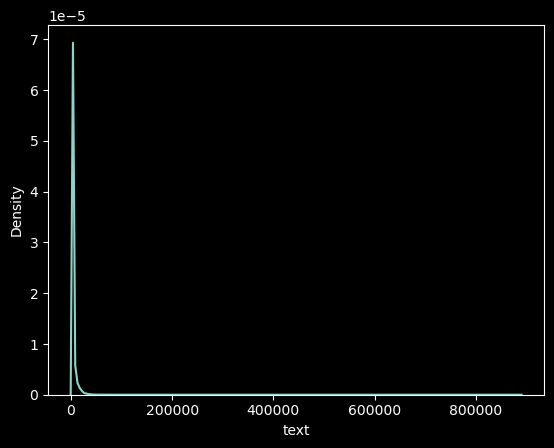

In [8]:
import seaborn as sns

text_length = df["text"].apply(len)

sns.kdeplot(x=text_length)

In [9]:
lower_bound = text_length.quantile(0.05)
upper_bound = text_length.quantile(0.95)

lower_bound, upper_bound

(329.0, 6143.25)

In [10]:
df = df[(text_length > lower_bound) & (text_length < upper_bound)]

<Axes: xlabel='text', ylabel='Density'>

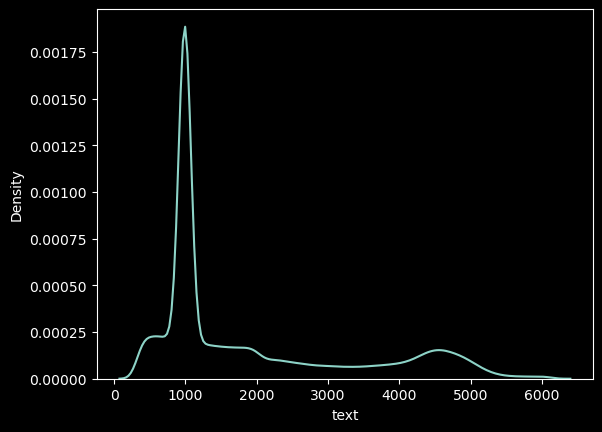

In [11]:
sns.kdeplot(x=df["text"].apply(len))

In [12]:
df.value_counts("label")

label
human    955461
ai       350787
Name: count, dtype: int64

In [13]:
# random undersampling the majority class
min_samples = df.value_counts("label").min()
dfb = df.groupby("label").sample(n=min_samples, random_state=0).reset_index(drop=True)
dfb["label"].value_counts()

label
ai       350787
human    350787
Name: count, dtype: int64

In [14]:
dfb.to_csv("../data/sample_70k.csv", index=False)

In [15]:
sample10k = dfb.sample(10000)
sample10k.value_counts("label")

label
ai       5032
human    4968
Name: count, dtype: int64

In [16]:
sample10k.to_csv("../data/sample_10k.csv", index=False)

In [17]:
dfb.sample(1000).to_csv("../data/sample_1k.csv", index=False)